### performing regression using analytical and machine learning models

In [1]:
import sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
print(sklearn.__version__)

0.23.1


In [3]:
advertising_data = pd.read_csv('advertising.csv')
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising_data.shape #to get the shape

(200, 4)

In [5]:
advertising_data.describe() # to get a quick statistical overview of the data

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


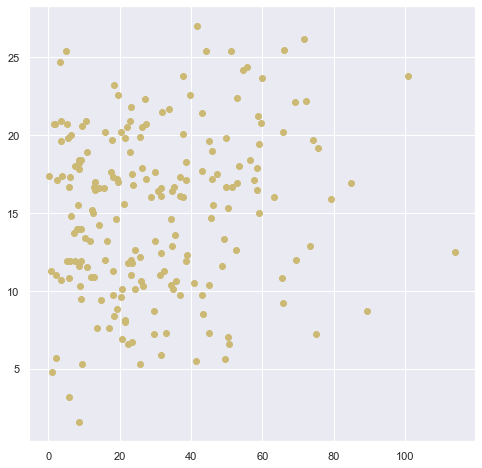

In [6]:
plt.figure(figsize = (8,8))
plt.scatter(advertising_data['Newspaper'], advertising_data['Sales'], c='y')
plt.show()

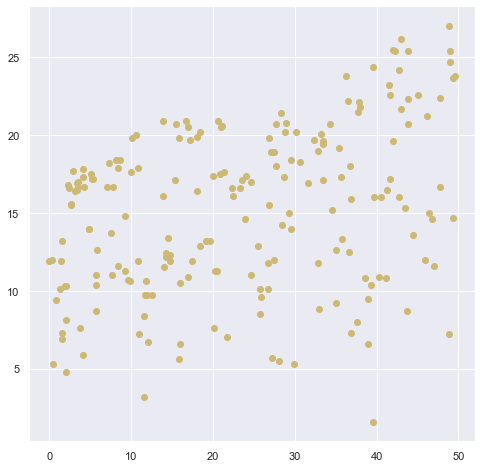

In [7]:
plt.figure(figsize = (8,8))
plt.scatter(advertising_data['Radio'], advertising_data['Sales'], c='y')
plt.show()

In [8]:
advertising_data_correlation = advertising_data.corr()#checking for correlation between our variables and our data
advertising_data_correlation # correlation values are between -1 and 1 and are the measure of the relationship between 2 variables
#correlation of 1 means perfect correlated variables

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


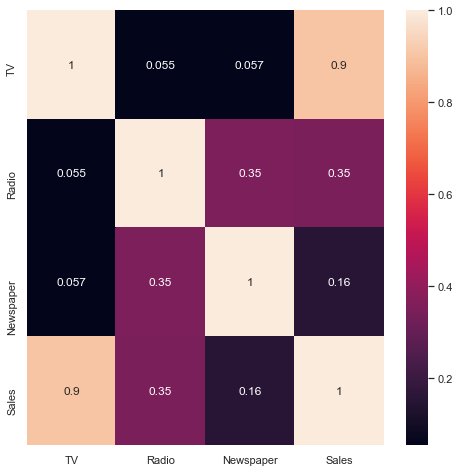

In [9]:
#using a heatmap visualization
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(advertising_data_correlation, annot = True)

In [10]:
#we import these to use for training our data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X = advertising_data['TV'].values.reshape(-1,1)
Y = advertising_data['Sales'].values.reshape(-1,1)

In [12]:
X.shape, Y.shape

((200, 1), (200, 1))

In [13]:
#using the train_test_split funcction in sklearn to split our data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [14]:
x_train.shape, x_test.shape

((140, 1), (60, 1))

In [15]:
y_train.shape, y_test.shape

((140, 1), (60, 1))

In [16]:
import statsmodels.api as sm
x_train_with_intercept = sm.add_constant(x_train)
statsmodel = sm.OLS(y_train, x_train_with_intercept)
fit_model = statsmodel.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           5.56e-51
Time:                        21:45:18   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438      0.400     17.838      0.0

In [17]:
linear_reg = LinearRegression(normalize = True).fit(x_train, y_train)
linear_reg

LinearRegression(normalize=True)

In [18]:
print("Training_score: ", linear_reg.score(x_train, y_train))

Training_score:  0.8059411537112771


In [19]:
# how does this model do on data it hasnt seen before
# we are using it on the test data to print out the R squared score

In [21]:
from sklearn.metrics import r2_score #importing the r2_score metrics which gives information about the goodness of fit of the model
y_pred = linear_reg.predict(x_test)
print("Testing score: ", r2_score (y_test, y_pred))

Testing score:  0.8150168765722069


In [22]:
### note: the r2 score for the test data is very close to the r2 score of the training data
#this is a good robust model

In [23]:
#calculating the adjusted r2
print("Adjusted_r2_score: ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test)) #google the error here

NameError: name 'adjusted_r2' is not defined